In [1]:
import random
import time
import numpy as np
from math import ceil, sqrt
from matplotlib import pyplot as plt

from ASA import ASAPlanner
from ASA_mod import ASAModPlanner
from ASA1_mod import ASAMod1Planner
from LSAP import LSAPPlanner
from LSAP_sq import LSAPSqPlanner
from LSAP_Layered import LSAPLayeredPlanner
from LSAP_Layered_mod import LSAPLayeredPlannerMOD

random.seed(10)

In [2]:
def get_sites(n_traps, fill_prob=0.6):
    N_len = ceil(sqrt(n_traps))
    n_rows = ceil(sqrt(n_traps * 2))
    n_cols = n_rows

#     print(f"Running for {n_traps} traps with {N_len} length in {n_rows} matrix")

    shift = int((n_rows - N_len) / 2)
    targets = []
    for i in range(N_len):
        for j in range(N_len):
            targets.append((i+shift, j+shift))
    
    atom_sites = []
    for i in range(n_rows):
        for j in range(n_cols):
            if random.random() < fill_prob:
                atom_sites.append((i, j))
    return n_rows, n_cols, targets, atom_sites

In [3]:
def get_total_len(moves):
    s = 0
    for start, end in moves:
        s += abs(start[0] - end[0]) + abs(start[1] - end[1])
    return s

In [24]:
metric = "cityblock"

def run_sim(n_runs, n_traps):
    n_moves = []
    times = []
    lens = []
    for i in range(n_runs):
        while True:
            try:
                n_rows, n_cols, targets, sources = get_sites(n_traps)
#                 planner = ASAMod1Planner(n_rows, n_cols, targets)
#                 planner = ASAPlanner(n_rows, n_cols, targets)
#                 planner = LSAPLayeredPlanner(n_rows, n_cols, targets, metric)
                planner = LSAPPlanner(n_rows, n_cols, targets, metric)
#                 planner = LSAPSqPlanner(n_rows, n_cols, targets, metric)

                start = time.time_ns()
                all_moves, num_moves = planner.get_moves(sources)
                end = time.time_ns()
            
                length = get_total_len(all_moves)
                break
            except ValueError:
                print("oopsies")
                continue
        
        n_moves.append(num_moves)
        times.append(end - start)
        lens.append(length)
    
    assert len(n_moves) == n_runs
    assert len(times) == n_runs
    assert len(lens) == n_runs
    
    avg_time = np.mean(times) / 1000
    avg_moves = np.mean(n_moves)
    avg_len = np.mean(lens)
    std_time = np.std(times) / 1000
    std_moves = np.std(n_moves)
    std_len = np.std(lens)
    
    return avg_time, std_time, avg_moves, std_moves, avg_len, std_len

In [28]:
# sizes = [9, 49, 100, 484, 1024, 5041] #, 10000] #, 50176]
sizes = [9, 100, 196, 289, 400, 484, 576, 676, 784, 900, 961, 1024]

stats_lsap1 = []
for n_traps in sizes:
    st = run_sim(20, n_traps)
    stats_lsap1.append(st)

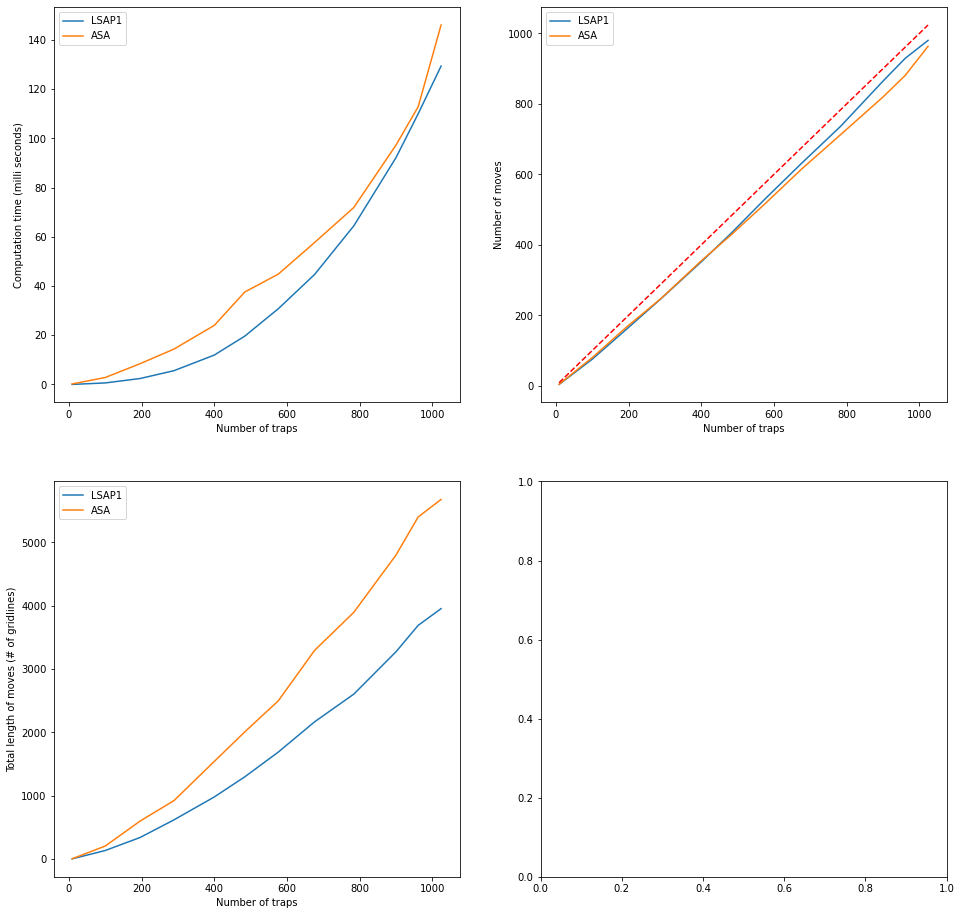

In [30]:
fig, (r1, r2) = plt.subplots(2, 2, figsize=(16, 16))
ax1, ax2 = r1
ax3, _ = r2

ax1.plot(sizes, [ele[0]/1000 for ele in stats_lsap1], 'tab:blue', label="LSAP1")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap1_sq], 'tab:cyan', label="LSAP1 (sqrd)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2], 'tab:red', label="LSAP2")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2_sq], 'tab:orange', label="LSAP2 (sqrd)")
# ax1.plot(sizes, [ele[0]/1000 for ele in stats_lsap1_layer], 'tab:brown', label="LSAP1 (Layered)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap1_layer_mod], 'tab:brown', label="LSAP1 (layered mod)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2_layer], 'tab:olive', label="LSAP2 (layer)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2_sq_layer], 'tab:gray', label="LSAP2 (sq; layer)")
ax1.plot(sizes, [ele[0]/1000 for ele in stats_asa], 'tab:orange', label="ASA")
# ax1.plot(sizes, [ele[0] for ele in stats_asa_mod], 'tab:pink', label="ASA (tuned)")
# ax1.plot(sizes, [ele[0] for ele in stats_asa_mod1], 'tab:brown', label="ASA1 (tuned)")

ax1.set_xlabel("Number of traps")
ax1.set_ylabel("Computation time (milli seconds)")
ax1.legend()

ax2.plot(sizes, [ele[2] for ele in stats_lsap1], 'tab:blue', label="LSAP1")
# ax2.plot(sizes, [ele[2] for ele in stats_lsap1_sq], 'tab:cyan', label="LSAP1 (sqrd)")
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2], 'tab:red')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2_sq], 'tab:orange')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap1_layer], 'tab:brown', label="LSAP1 (Layered)")
# ax2.plot(sizes, [ele[2] for ele in stats_lsap1_layer_mod], 'tab:brown', label="LSAP1 (layered mod)")
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2_layer], 'tab:olive')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2_sq_layer], 'tab:gray')
ax2.plot(sizes, [ele[2] for ele in stats_asa], 'tab:orange', label="ASA")
# ax2.plot(sizes, [ele[2] for ele in stats_asa_mod], 'tab:pink')
# ax2.plot(sizes, [ele[2] for ele in stats_asa_mod1], 'tab:brown')

# ax2.plot(sizes, [ele / 2 for ele in sizes], "g--")
ax2.plot(sizes, [ele for ele in sizes], "r--")
ax2.set_xlabel("Number of traps")
ax2.set_ylabel("Number of moves")
ax2.legend()

ax3.plot(sizes, [ele[4] for ele in stats_lsap1], 'tab:blue', label="LSAP1")
# ax3.plot(sizes, [ele[4] for ele in stats_lsap1_sq], 'tab:cyan', label="LSAP1 (sqrd)")
# ax3.plot(sizes, [ele[4] for ele in stats_lsap2], 'tab:red')
# ax3.plot(sizes, [ele[4] for ele in stats_lsap2_sq], 'tab:orange')
# ax3.plot(sizes, [ele[4] for ele in stats_lsap1_layer], 'tab:brown', label="LSAP1 (Layered)")
# ax3.plot(sizes, [ele[4] for ele in stats_lsap1_layer_mod], 'tab:brown', label="LSAP1 (layered mod)")
# ax3.plot(sizes, [ele[4] for ele in stats_lsap2_layer], 'tab:olive')
# ax3.plot(sizes, [ele[4] for ele in stats_lsap2_sq_layer], 'tab:gray')
ax3.plot(sizes, [ele[4] for ele in stats_asa], 'tab:orange', label="ASA")
# ax3.plot(sizes, [ele[4] for ele in stats_asa_mod], 'tab:pink')
# ax3.plot(sizes, [ele[4] for ele in stats_asa_mod1], 'tab:brown')

ax3.set_xlabel("Number of traps")
ax3.set_ylabel("Total length of moves (# of gridlines)")
ax3.legend()

# Descriptions
LSAP1 = Manhattan Distance = sum( abs(x1 - x2) + abs(y1 - y2) )
LSAP1 (SQ) = Squared
LSAP2 = Euclidean Distance = sqrt( sum( sqr(x1 - x2) + sqr(y1 -y2) ) )
LSAP2 (SQ) = Squared l2
ASA = A* Search
LSAPX (layer) = 

Text(0, 0.5, 'Number of moves')

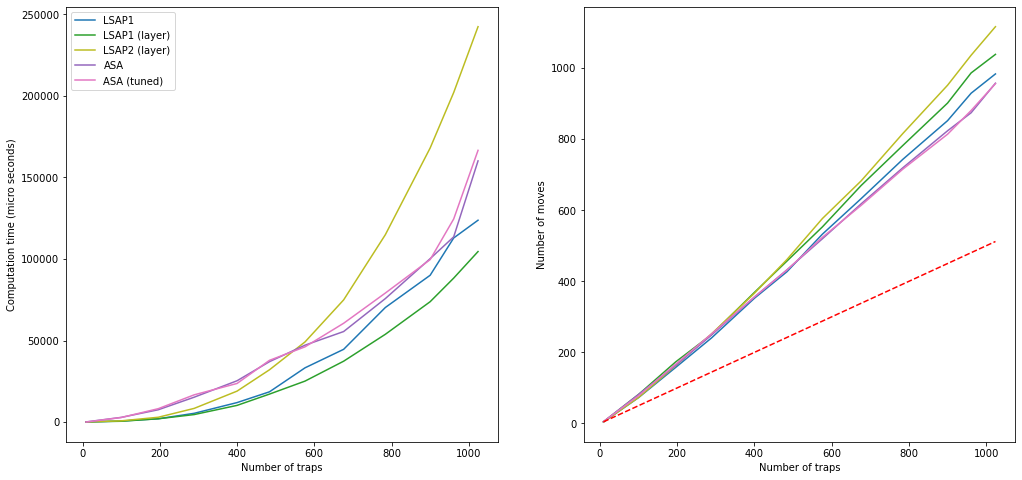

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))

ax1.plot(sizes, [ele[0] for ele in stats_lsap1], 'tab:blue', label="LSAP1")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap1_sq], 'tab:cyan', label="LSAP1 (sqrd)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2], 'tab:red', label="LSAP2")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2_sq], 'tab:orange', label="LSAP2 (sqrd)")
ax1.plot(sizes, [ele[0] for ele in stats_lsap1_layer], 'tab:green', label="LSAP1 (layer)")
ax1.plot(sizes, [ele[0] for ele in stats_lsap2_layer], 'tab:olive', label="LSAP2 (layer)")
# ax1.plot(sizes, [ele[0] for ele in stats_lsap2_sq_layer], 'tab:gray', label="LSAP2 (sq; layer)")
ax1.plot(sizes, [ele[0] for ele in stats_asa], 'tab:purple', label="ASA")
ax1.plot(sizes, [ele[0] for ele in stats_asa_mod], 'tab:pink', label="ASA (tuned)")


ax1.set_xlabel("Number of traps")
ax1.set_ylabel("Computation time (micro seconds)")
ax1.legend()

ax2.plot(sizes, [ele[2] for ele in stats_lsap1], 'tab:blue')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap1_sq], 'tab:cyan')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2], 'tab:red')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2_sq], 'tab:orange')
ax2.plot(sizes, [ele[2] for ele in stats_lsap1_layer], 'tab:green')
ax2.plot(sizes, [ele[2] for ele in stats_lsap2_layer], 'tab:olive')
# ax2.plot(sizes, [ele[2] for ele in stats_lsap2_sq_layer], 'tab:gray')
ax2.plot(sizes, [ele[2] for ele in stats_asa], 'tab:purple')
ax2.plot(sizes, [ele[2] for ele in stats_asa_mod], 'tab:pink')

ax2.plot(sizes, [ele / 2 for ele in sizes], "r--")
ax2.set_xlabel("Number of traps")
ax2.set_ylabel("Number of moves")

### Some parameters
According to [Tian 2022]
- Ramp up/down: $60 \mu s$ each
- Time for 1 cell distance: $\approx 40 \mu s$ (assuming $5 \mu m$ separation)

So better to search $\approx 3$ cell blocks more instead of taking filled target's atom.